
## Real estate data cleaning with Pandas for efficient analysis

This is a real dataset that was downloaded using web scraping techniques. The data contains records from Fotocasa, one of the most popular real estate websites in Spain. Please do not perform web scraping unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and no economic benefit was obtained from it.

It contains thousands of real house listings published on the website www.fotocasa.com. Your goal is to extract as much information as possible with the data science knowledge you have acquired so far.

Let's get started!

- First, let's read and explore the dataset.



In [2]:
# Step 0. Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
# Step 1. Load Data.
df_raw = pd.read_csv("../real_estate.csv",sep=";")
df_raw.sample(10)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
15175,15176,153562582,False,mercado mundo inmobiliario,911799481.0,https://www.fotocasa.es/es/comprar/vivienda/el...,3.0,1.0,60.0,93000,...,0,0,0,0,0,0,"40,34602","-3,68431",NaN,NaN
3778,3779,153472293,False,aurea homes,911227138.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,NaN,345000,...,0,0,0,0,0,1,"40,31622","-3,73848",NaN,NaN
7711,7712,141931043,False,aproperties,914890879.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,5.0,3.0,369.0,2500000,...,0,0,0,0,0,0,"40,44169","-3,69043",NaN,NaN
5351,5352,153895524,False,blue home,916359164.0,https://www.fotocasa.es/es/comprar/vivienda/al...,2.0,2.0,71.0,140000,...,0,0,0,0,0,0,"40,5552751","-3,3297233",NaN,NaN
9607,9608,152064024,False,elisa,911791398.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,1.0,220.0,190000,...,0,0,0,0,0,1,"40,73181","-3,94966",NaN,NaN
10000,10001,153965413,False,solvia inmobiliaria,961284629.0,https://www.fotocasa.es/es/comprar/vivienda/al...,2.0,2.0,76.0,222500,...,0,0,0,0,0,1,"40,4980556","-3,3755556",NaN,NaN
13073,13074,153463948,False,gilmar orense d,912788032.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,112.0,390000,...,0,0,0,0,0,0,"40,47195","-3,71546",NaN,NaN
9913,9914,153961509,False,garsierra,912179623.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,133.0,525000,...,0,0,0,0,0,1,"40,49489","-3,65906",NaN,NaN
12425,12426,153354210,False,pqcentro,912665783.0,https://www.fotocasa.es/es/comprar/vivienda/co...,3.0,1.0,79.0,139900,...,0,0,0,0,0,0,"40,24049","-3,70087",NaN,NaN
1096,1097,153066338,False,aciertocasa api,NaN,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,2.0,40.0,86000,...,0,0,0,0,0,0,"40,39799","-3,73243",NaN,NaN


In [4]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [5]:
#Step 02. Pre-processing
df_baking = df_raw.copy()
df_baking = df_baking.iloc[:,1:-2]
df_baking["date"] = pd.to_datetime(df_baking["date"],errors="coerce")
df_baking.columns = df_baking.columns.str.lower()
df_baking = df_baking.drop(columns=["country","countryid","level1id","level2id","level3id","level4id","level5id","level6id","level7id","level8id","accuracy"])
df_baking ["id_realestates"] = df_baking["id_realestates"].astype("category")
df_baking ["phone_realestate"] = df_baking["phone_realestate"].astype("category")
df_baking ["realestate_name"] = df_baking["realestate_name"].astype("category")
df_baking ["url_inmueble"] = df_baking["url_inmueble"].astype("category")
df_baking ["address"] = df_baking["address"].astype("category")
df_baking ["description"] = df_baking["description"].astype("category")
df_baking ["latitude"] = df_baking["latitude"].str.replace(",",".")
df_baking ["latitude"] = df_baking["latitude"].astype("float")
df_baking ["longitude"] = df_baking["longitude"].str.replace(",",".")
df_baking ["longitude"] = df_baking["longitude"].astype("float")
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id_realestates    15335 non-null  category           
 1   isnew             15335 non-null  bool               
 2   realestate_name   15325 non-null  category           
 3   phone_realestate  14541 non-null  category           
 4   url_inmueble      15335 non-null  category           
 5   rooms             14982 non-null  float64            
 6   bathrooms         14990 non-null  float64            
 7   surface           14085 non-null  float64            
 8   price             15335 non-null  int64              
 9   date              683 non-null    datetime64[ns, UTC]
 10  description       15193 non-null  category           
 11  address           15335 non-null  category           
 12  level1            15335 non-null  object             
 13  l

In [6]:
df = df_baking.copy()
df.sample (5, random_state=2025)

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
11956,153704529,False,habita mad,918007061.0,https://www.fotocasa.es/es/comprar/vivienda/gu...,3.0,1.0,72.0,214000,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Hortaleza,Canillas,Canillas,40.464490,-3.632650
7285,150530836,False,desarrollo de viviendas nueva ciudad,916358709.0,https://www.fotocasa.es/vivienda/alcala-de-hen...,3.0,2.0,112.0,243800,NaT,...,Madrid,Zona Sur de Madrid,"Parla, Zona de",Parla,NaN,Centro,NaN,Centro,40.237680,-3.774230
14035,153921873,False,garsierra,912179623.0,https://www.fotocasa.es/es/comprar/vivienda/ti...,1.0,2.0,72.0,85000,NaT,...,Madrid,Corredor del Henares,"Camarma de Esteruelas, Zona de",Camarma de Esteruelas,NaN,NaN,NaN,Camarma de Esteruelas,40.550675,-3.377295
10823,150512853,False,covibarges,912175971.0,https://www.fotocasa.es/vivienda/arganda-del-r...,3.0,2.0,107.0,255000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Rivas-Vaciamadrid, Zona de",Rivas-vaciamadrid,NaN,Rivas Urbanizaciones,NaN,Rivas Urbanizaciones,40.382190,-3.530690
5778,148949209,False,urban,912780256.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,4.0,4.0,NaN,439000,NaT,...,Madrid,Zona Suroeste,"Brunete, Zona de",Brunete,NaN,NaN,NaN,Brunete,40.397230,-3.998940


In [7]:
#Exercise 01
#df ["price"].max()
#df.sort_values (by = "price", ascending = False).iloc[0,:]
df.sort_values(by = "price", ascending=False).head(1)

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
13110,132042636,False,engel volkers torrelodones,911798512.0,https://www.fotocasa.es/es/comprar/vivienda/vi...,19.0,NaN,NaN,8500000,NaT,...,Madrid,Zona Noroeste,"El Escorial, Zona de",El Escorial,NaN,Centro - Manquilla,NaN,Centro - Manquilla,40.58308,-4.129519


In [8]:
#Filtrar por columnas
df[df["price"] != 0].sort_values(by= "price", ascending=True)[["address","price"]].head(1)

,address,price
7491,"Berlin, Coslada",600


In [9]:
#data frame que muestre el primer valor ascendente que incluya el primero en address y surface.

df.sort_values(by="surface", ascending=True).head(1)[["address","surface"]]

,address,surface
498,"Calle Amparo, Madrid Capital",15.0


In [10]:
#data frame que muestre el primer valor ascendente que incluya el último en address y surface.
df.sort_values(by="surface", ascending=True).tail(1)[["address","surface"]]

,address,surface
15328,"Calle de Manuela Malasaña, Madrid Capital",NaN


In [11]:
#cuenta todos los valores únicos en una columna
level5_list = df["level5"].unique().tolist()
level5_count = df["level5"].nunique()
print(f"Hay {level5_count} ciudades y estas son: {"," .join(level5_list)}")


Hay 168 ciudades y estas son: Arganda del Rey,Fuenlabrada,Boadilla del Monte,Las Rozas de Madrid, Madrid Capital,Villaviciosa de Odón,Pinto,Valdemoro,Navalcarnero,Pozuelo de Alarcón,Torrejón de Ardoz,Navalagamella,San Sebastián de los Reyes,Rivas-vaciamadrid,Alpedrete,Móstoles,San Fernando de Henares,Coslada,Becerril de la Sierra,Alcalá de Henares,Chinchón,Parla,Alcorcón,El Escorial,Leganés,Pedrezuela,Majadahonda,Villanueva de la Cañada,Villanueva del Pardillo,Torrelodones,Moralzarzal,Mejorada del Campo,Aranjuez,Corpa,Getafe,Velilla de San Antonio,Sevilla la Nueva,San Martín de la Vega,Villalbilla,Collado Villalba,Alcobendas,El Molar (Madrid),Moraleja de Enmedio,Algete,Campo Real,Torrejón de la Calzada,Colmenar Viejo,Valdemorillo,Fuente El Saz de Jarama,Tres Cantos,Arroyomolinos (Madrid),Griñón,Paracuellos de Jarama,Guadarrama,Titulcia,Galapagar,Collado Mediano,Los Molinos,San Lorenzo de El Escorial,Loeches,San Martín de Valdeiglesias,Navas del Rey,Bustarviejo,Manzanares El Real,Caraba

In [12]:
df.isna().sum()

id_realestates          0
isnew                   0
realestate_name        10
phone_realestate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                14652
description           142
address                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperlevel              0
latitude                0
longitude               0
dtype: int64

In [13]:
df.dropna(subset=["surface"])

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,40.294828,-3.444024
2,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,40.411565,-3.906623
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.285379,-3.795081
4,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,40.299877,-3.452263
5,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,2019-12-28 18:27:15.968054700+00:00,...,Madrid,Zona Noroeste,"Las Rozas de Madrid, Zona de",Las Rozas de Madrid,NaN,El Pinar - Punta Galea,NaN,El Pinar - Punta Galea,40.533910,-3.894450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,40.454160,-3.702860
15331,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.366520,-3.489510
15332,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,NaT,...,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,40.574440,-3.921240
15333,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.369670,-3.481050


In [14]:
#Promedio de precios en Arroyomolinos (Madrid)
precio_medio = df[df["level5"] == "Arroyomolinos (Madrid)"]["price"].mean()
print(f"El precio medio en Arroyomolinos es: {precio_medio:.1f}") #1.f un decimal nada más
print(f"El precio medio en Arroyosmolinos (Madrid) es de {round(precio_medio,1)}$")

El precio medio en Arroyomolinos es: 294541.6
El precio medio en Arroyosmolinos (Madrid) es de 294541.6$


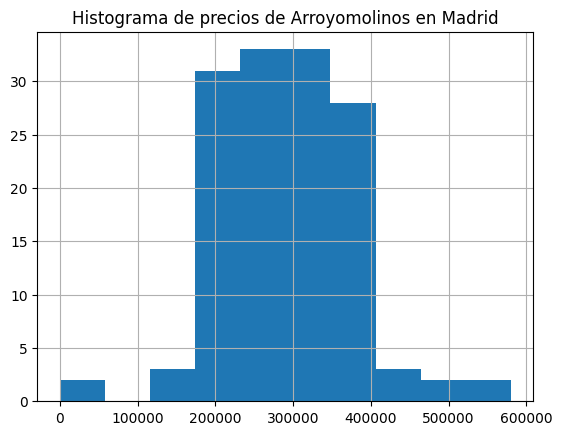

In [15]:
#Istograma de precios
df[df["level5"] == "Arroyomolinos (Madrid)"]["price"].hist()
plt.title("Histograma de precios de Arroyomolinos en Madrid")
plt.show()

In [16]:
city1 = "Valdemorillo"
city2 = "Galapagar"
pps_valdemorillo = df.assign(price_per_area=df["price"]/df["surface"]).query("level5==@city1")["price_per_area"].mean()
pps_galapagar = df.assign(price_per_area=df["price"]/df["surface"]).query("level5==@city2")["price_per_area"].mean()
print(f"El precio promedio de Galapagar es: {pps_galapagar:.1f} y el de Valdemorillos {pps_valdemorillo:.1f}")


El precio promedio de Galapagar es: 1606.3 y el de Valdemorillos 1318.0


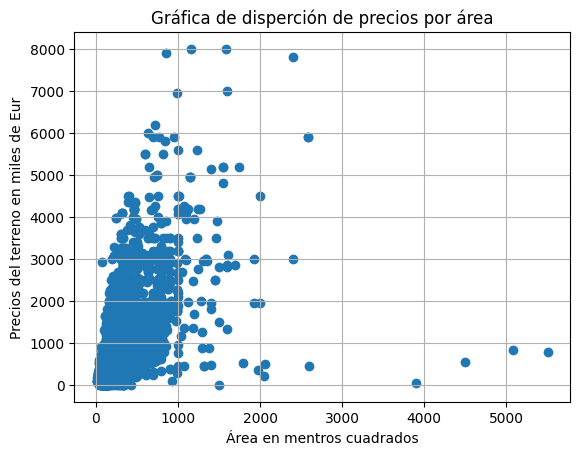

In [17]:
plt.scatter(df[df["surface"]<10000]["surface"],df[df["surface"]<10000]["price"]/1000)
plt.xlabel("Área en mentros cuadrados")
plt.ylabel("Precios del terreno en miles de Eur") 
plt.grid(True)
plt.title("Gráfica de disperción de precios por área")
plt.show()

In [18]:
df.groupby(by="level5").size().sort_values(ascending=False)

level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Montejo de la Sierra       1
Lozoya                     1
Pinilla del Valle          1
Rascafría                  1
Piñuécar-gandullas         1
Length: 168, dtype: int64


Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map


In [20]:
new_df = df[df["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
new_df

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
1,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.286740,-3.793510
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.285379,-3.795081
85,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28 18:30:53.960102+00:00,...,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Centro,Casco Antiguo,Casco Antiguo,40.350590,-3.826930
94,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28 18:30:53.960102+00:00,...,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Valdepelayo - Montepinos - Arroyo Culebro,NaN,Valdepelayo - Montepinos - Arroyo Culebro,40.319330,-3.775740
109,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28 18:32:32.533794200+00:00,...,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Prado Santo Domingo - Ensanche,NaN,Prado Santo Domingo - Ensanche,40.331341,-3.831387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,NaT,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Loranca,NaN,Loranca,40.313810,-3.837330
15291,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,NaT,...,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Centro de Leganés,NaN,Centro de Leganés,40.325905,-3.763180
15305,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,NaT,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Fuenlabrada II - El Molino,NaN,Fuenlabrada II - El Molino,40.288219,-3.809862
15322,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,NaT,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.282820,-3.788920


In [22]:
from ipyleaflet import Map, basemaps
map = Map()

## **Conclusiones** 
- Conclusion 1 
- Conclusion 2 
- Conclusion 3